**Exercise 19.2**

ANSWER: The period and amplitude after t=2 or 3 are about 1.0 and 0.3, respectively. 

At $\tau$=1.0 and $\gamma$=0.5: 
- Period is roughly 1.0 and period is roughly 0.15.

At $\tau$=2.0 and $\gamma$=1.0: 
- Period is roughly 2.0 and period is roughly 0.3.

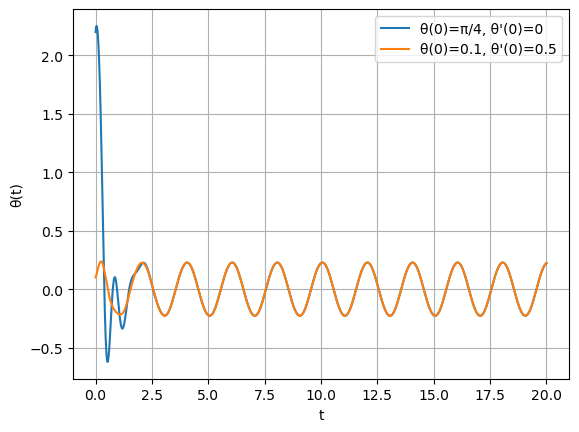

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
# tau = 1.0
tau = 2.0
gamma = 1.0
# gamma = 0.5

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# Two initial conditions
t, theta1, vel1 = rk4(0, 20, 5000, 2.2, 2.5)  
_, theta2, vel2 = rk4(0, 20, 5000, 0.1, 0.5)

# Plot
plt.plot(t, theta1, label="θ(0)=π/4, θ'(0)=0")
plt.plot(t, theta2, label="θ(0)=0.1, θ'(0)=0.5")
plt.xlabel("t")
plt.ylabel("θ(t)")
plt.legend()
plt.grid()
plt.show()

**Exercise 19.3a**

ANSWER: Yes, the ratio comes closer to 16 as theta increases. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = 1.0

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# convergence test for N, 2N, 4N
def final_theta(N):
    t, theta, vel = rk4(0, 10, N, 0.1, 0.0)  # θ=0.1, θ'=0
    return theta[-1]

N = 2000     
theta_N   = final_theta(N)
theta_2N  = final_theta(2*N)
theta_4N  = final_theta(4*N)

ratio = abs(theta_N - theta_2N) / abs(theta_2N - theta_4N)

print("Theta(N)  =", theta_N)
print("Theta(2N) =", theta_2N)
print("Theta(4N) =", theta_4N)
print("Ratio ≈", ratio)

Theta(N)  = 0.27835720882479315
Theta(2N) = 0.27835719732244374
Theta(4N) = 0.2783571965981181
Ratio ≈ 15.880080080985318


**Exercise 19.4a**

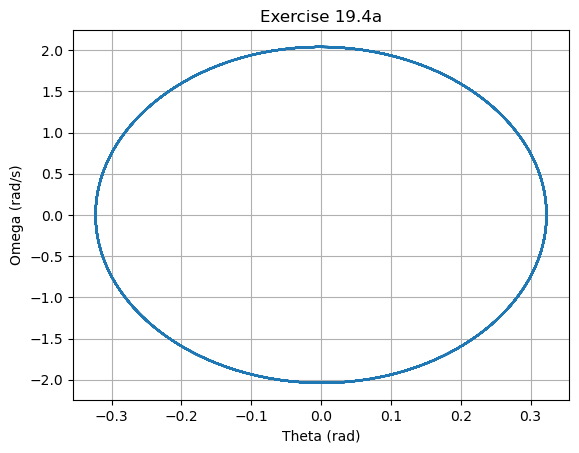

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = 1.0

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y


t, theta, omega = rk4(0, 20, 5000, 0.0, 0.0)

mask = t > 5.0  

# Phase-space plot
plt.plot(theta[mask], omega[mask])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title("Exercise 19.4a")
plt.grid()
plt.show()

**Exercise 19.4b**

ANSWER: The motion is a steady-state oscillation since the amplitude since the amplitude is roughly the same after the transient dies out. The period seems to be roughly 2.5. 

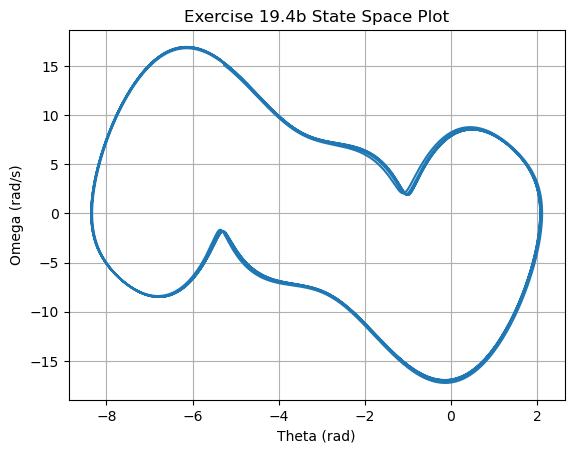

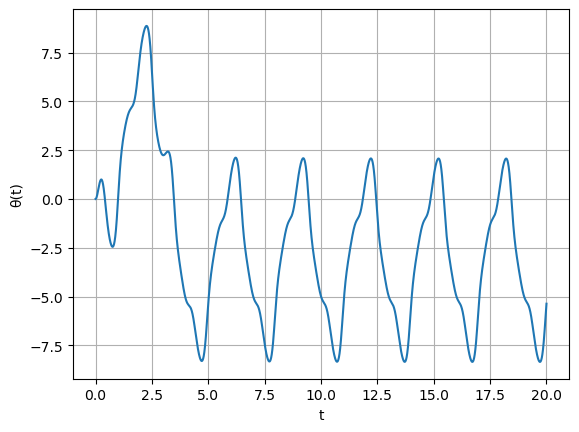

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = 5.15

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y


t, theta, omega = rk4(0, 20, 5000, 0.0, 0.0)

mask = t > 5.0  

# Phase-space plot
plt.plot(theta[mask], omega[mask])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title("Exercise 19.4b State Space Plot")
plt.grid()
plt.show()

# Theta vs t
plt.plot(t, theta)
plt.xlabel("t")
plt.ylabel("θ(t)")
plt.grid()
plt.show()

**Exercise 19.5a**

ANSWER: The period of the motion appears to be roughly 1.2.

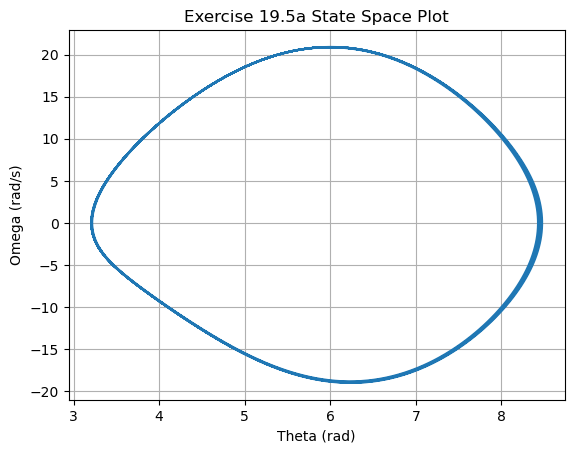

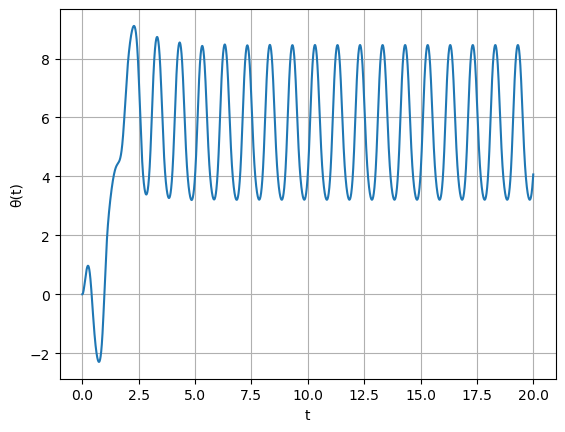

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = 5

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y


t, theta, omega = rk4(0, 20, 5000, 0.0, 0.0)

mask = t > 5.0  

# Phase-space plot
plt.plot(theta[mask], omega[mask])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title("Exercise 19.5a State Space Plot")
plt.grid()
plt.show()

# Theta vs t
plt.plot(t, theta)
plt.xlabel("t")
plt.ylabel("θ(t)")
plt.grid()
plt.show()

**Exercise 19.5b**

ANSWER: This motion is not steady-state and shows period doubling, where the there's "synchronization" with every other cycle. 

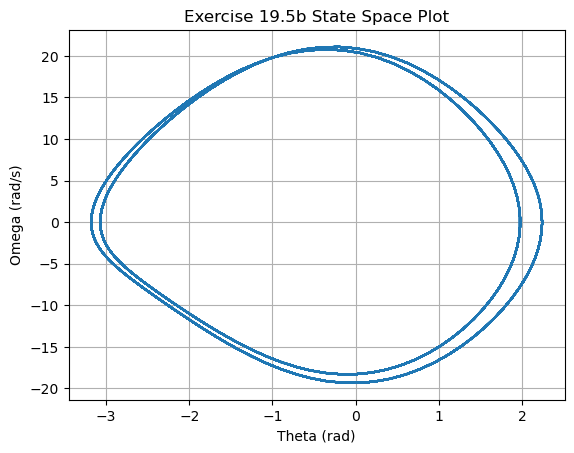

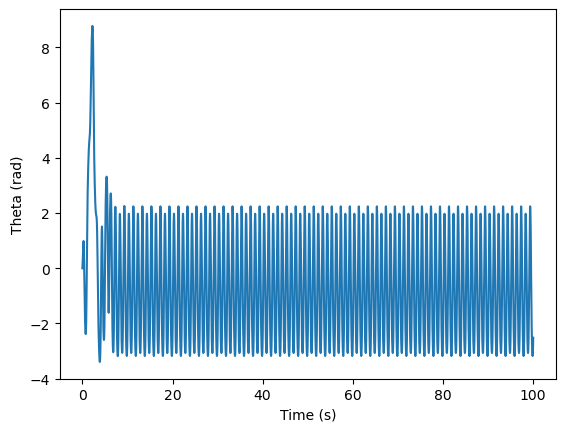

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = (5.0568 + 5.1177) / 2 

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y


tf = 100
N = 10000  
t, theta, omega = rk4(0, tf, N, 0.0, 0.0)

# Long term only
mask = t > 0.5 * tf # Top 50%?

# Phase-space plot
plt.plot(theta[mask], omega[mask])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title("Exercise 19.5b State Space Plot")
plt.grid()
plt.show()

# Theta vs time plot
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.show()

**Exericse 19.6a**

ANSWER: The motion is not periodic. There is no synchronization/pattern in the oscillations. 

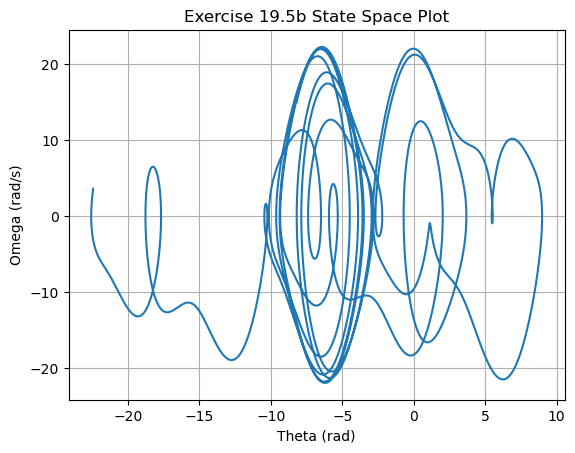

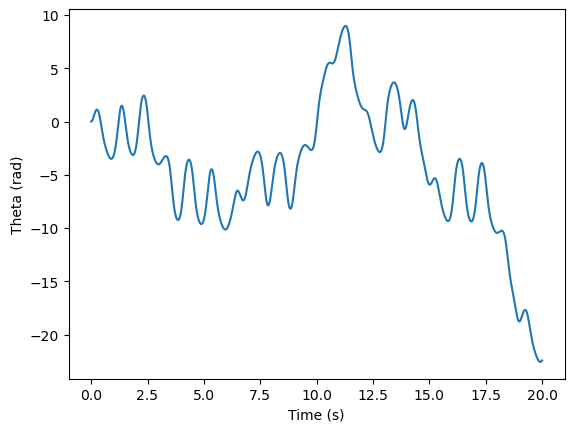

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.8
m = 0.5
l = 0.11
beta = 0.25
tau = 1.0
gamma = 5.7

# ODEs
def f1(t, x, y):
    return y

def f2(t, x, y):
    return -(g/l) * np.sin(x) - (beta/(m*l)) * y + (gamma/(m*l)) * np.cos((2*np.pi*t)/tau)

# RK4
def rk4(t0, tf, N, xi, yi):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = xi
    y[0] = yi

    # Iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y


tf = 20
N = 10000  
t, theta, omega = rk4(0, tf, N, 0.0, 0.0)

# Long term only
mask = t > 0.2 * tf # Top 50%?

# Phase-space plot
plt.plot(theta[mask], omega[mask])
plt.xlabel('Theta (rad)')
plt.ylabel('Omega (rad/s)')
plt.title("Exercise 19.5b State Space Plot")
plt.grid()
plt.show()

# Theta vs time plot
plt.plot(t, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.show()